In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings

In [22]:
data = pd.read_csv('data/stud.csv')

In [23]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [24]:
X = data.drop(columns=['math_score'],axis=1)
y = data['math_score']

In [25]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [26]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

In [27]:
num_features

Index(['reading_score', 'writing_score'], dtype='object')

In [28]:
cat_features

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')

In [29]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer =StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder',oh_transformer,cat_features),
        ('StandardScaler',numeric_transformer,num_features)
    ]
)

In [30]:
X = preprocessor.fit_transform(X)

In [31]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 19), (200, 19), (800,), (200,))

creating an Evaluate Funtion to give all metrics Model Training

In [33]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae, rmse, r2_square
    

In [44]:
models = {
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'K-Neighbors Regressor': KNeighborsRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'XGBRegressor': XGBRegressor(),
    'CatBoosting Regressor': CatBoostRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor()
}
model_list = []
r2_list = [] 

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train,y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test,y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])


    print('Model performance for Training set')
    print('Root Mean Squared Error: {:.4f}'.format(model_train_rmse))
    print('Mean Absolute Error: {:.4f}'.format(model_train_mae))
    print('R2 score: {:.4f}'.format(model_train_r2))
    print('\n')

    print('Model performance for Testing set')
    print('Root Mean Squared Error: {:.4f}'.format(model_test_rmse))
    print('Mean Absolute Error: {:.4f}'.format(model_test_mae))
    print('R2 score: {:.4f}'.format(model_test_r2))

    r2_list.append(model_test_r2)

    print('---------------------------------------------')

LinearRegression
Model performance for Training set
Root Mean Squared Error: 5.3255
Mean Absolute Error: 4.2685
R2 score: 0.8742


Model performance for Testing set
Root Mean Squared Error: 5.4009
Mean Absolute Error: 4.2184
R2 score: 0.8801
---------------------------------------------
Lasso
Model performance for Training set
Root Mean Squared Error: 6.5938
Mean Absolute Error: 5.2063
R2 score: 0.8071


Model performance for Testing set
Root Mean Squared Error: 6.5197
Mean Absolute Error: 5.1579
R2 score: 0.8253
---------------------------------------------
Ridge
Model performance for Training set
Root Mean Squared Error: 5.3233
Mean Absolute Error: 4.2650
R2 score: 0.8743


Model performance for Testing set
Root Mean Squared Error: 5.3904
Mean Absolute Error: 4.2111
R2 score: 0.8806
---------------------------------------------
K-Neighbors Regressor
Model performance for Training set
Root Mean Squared Error: 5.7093
Mean Absolute Error: 4.5175
R2 score: 0.8554


Model performance for 

In [49]:
pd.DataFrame(list(zip(model_list,r2_list)), columns = ['Model Name', 'R2_Score'], ).sort_values(by='R2_Score',ascending=False).reset_index(drop=True)

,Model Name,R2_Score
0,Ridge,0.880593
1,LinearRegression,0.880127
2,Random Forest Regressor,0.853071
3,CatBoosting Regressor,0.851632
4,AdaBoost Regressor,0.848493
5,XGBRegressor,0.827797
6,Lasso,0.825320
7,K-Neighbors Regressor,0.783497
8,Decision Tree Regressor,0.715889


In [53]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print('Accuracy of the model is %.2f'%score)

Accuracy of the model is 88.01


##### Plot the Results

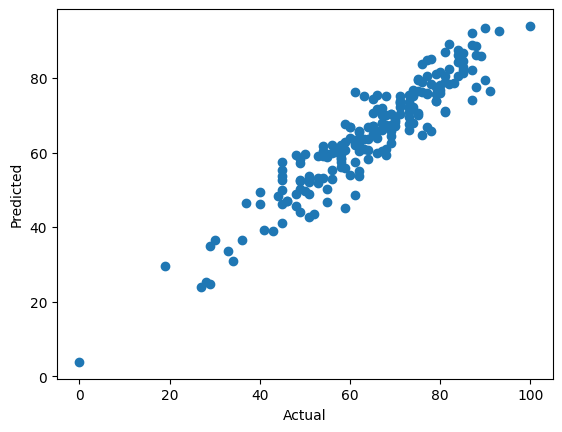

In [55]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

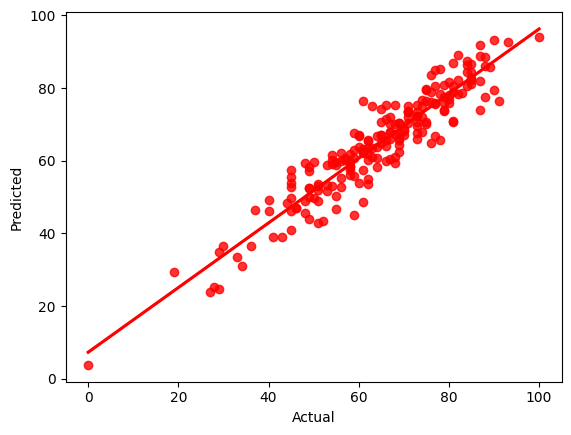

In [58]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [60]:
pred_df = pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred, 'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.513672,14.486328
737,53,58.976562,-5.976562
740,80,76.884766,3.115234
660,74,76.710938,-2.710938
411,84,87.521484,-3.521484
...,...,...,...
408,52,43.564453,8.435547
332,62,61.994141,0.005859
208,74,68.009766,5.990234
613,65,67.134766,-2.134766
